[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Some-Usefull-Machine-Learning-Stuff/blob/main/HW/HW2.ipynb)



```
# Auto Encoders --- Data Compression
## You will implement what is called an autoencoder.
```



In [16]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.losses import sparse_categorical_crossentropy
import matplotlib.pyplot as plt

# From Wikipedia
An autoencoder is a type of artificial neural network used to learn efficient codings of unlabeled data (unsupervised learning). An autoencoder learns two functions: an encoding function that transforms the input data, and a decoding function that recreates the input data from the encoded representation. The autoencoder learns an efficient representation (encoding) for a set of data, typically for dimensionality reduction. 

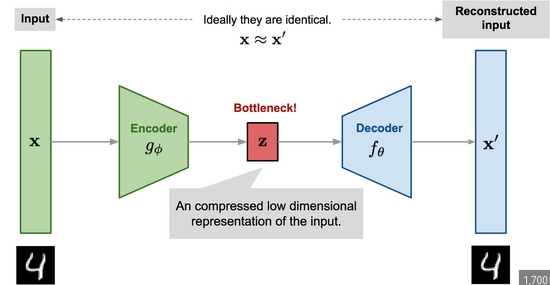


In this example you will implement the simples Autoencoder, e.g., PCA.

In [44]:
### Load the data you will use only the training data, not the labels
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train/255.0  ## Normalize 
X_test = X_test/255.0

In [37]:
class autoencoder(Model):
  def __init__(self, output_dim = 2): 
    super().__init__()
    self.encoder = None ###Dense layer with output as output_dim
    self.decoder = None ### Dense layer with output as the flattened output of a fashion mnist picture
  def encoder_call(self, inputs):
    inputs = Flatten()(inputs)
    return self.encoder(inputs) ### this is for encoder output
  def call(self, x, train = None):
    ### flatten x
    ### then  send it to encoder,
    ### then send it to decoder,
    return tf.reshape(x,(-1,28,28)) ### we are reshaping it to add batch dimension.
## For visualization purposses we used 2 as the output dimension, this corresponds to number of PCA components used.    

In [39]:
model = autoencoder()
model.compile(loss = "mse") 
### your code here, fit the model. Remember that X_train goes in X_train goes out. You won't use y_train, the same for validation data

In [ ]:
### Run this cell to check if your autoencoder is doin goood?
encoder_output = model.encoder_call(X_test).numpy()
for i in range(10):
  plt.scatter(encoder_output[y_test == i, 0], encoder_output[y_test == i, 1], label = f"{i}")
plt.legend()
plt.show()